<a href="https://colab.research.google.com/github/MinsooKwak/Study/blob/main/CV/first_look/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image     # 이미지 출력
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [105]:
SEED = 34

## 0. 도입 전 기본 처리

- load data

In [106]:
mnist = keras.datasets.mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

In [107]:
print(f'train image shape : {train_images.shape}')
print(f'test  image shape : {test_images.shape}')

print(f'train label shape : {train_labels.shape}')
print(f'test  labels shape : {test_labels.shape}')

train image shape : (60000, 28, 28)
test  image shape : (10000, 28, 28)
train label shape : (60000,)
test  labels shape : (10000,)


B , H, W

- 이미지 출력

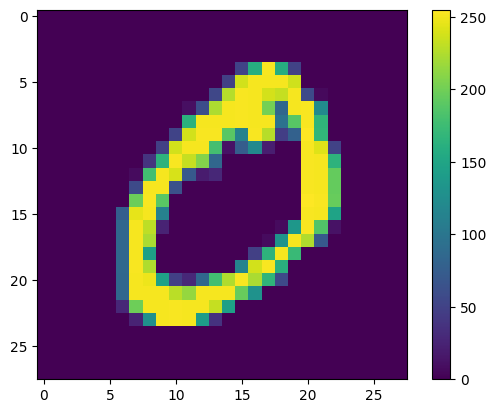

0


In [108]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
#plt.grid(True)
plt.show()
print(train_labels[1])

- train_images에서 0 아닌 값 출력

In [109]:
train_images[0].shape

(28, 28)

In [110]:
# print(train_images[0])  # 대괄호 2개

In [111]:
# train_images[0].reshape(-1) # 1차원으로 변경 (대괄호 1개)

In [112]:
filter(lambda x: x !=0, train_images[0].reshape(-1))  # 앞에 나온 것이 참이어야만 반환해줌 # 그대로 출력시 generator

In [113]:
sorted(list(filter(lambda x: x !=0, train_images[0].reshape(-1)))[:10])  # 0이 사라짐 # 앞에 10개만 예시로, 정렬

[3, 18, 18, 18, 26, 126, 136, 166, 175, 255]

- dtype
  - u : 음수 없다
  - int : 정수다
  - 8 : 얼마나 큰 데이터를 다루나 (8bit, 꽤 작은값 다룸)

In [114]:
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype)

uint8
uint8
uint8
uint8


## 1. 전처리

실제 데이터를 모델에 맞게 정돈하거나 쓰레기 빼거나, 증폭시키거나 모델이 소화할 수 있는 방법으로 바꾸는 과정

In [115]:
print(list(filter(lambda x: x !=0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x !=0, train_labels.reshape(-1)))[:10])     # label은 1차원이니까 [0] 제거
print(list(filter(lambda x: x !=0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x !=0, test_labels.reshape(-1)))[:10])

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[84, 185, 159, 151, 60, 36, 222, 254, 254, 254]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


- 이미지의 max, min값 확인

In [116]:
print(train_images.reshape((60000, 28*28)).shape)
print(train_images.reshape((60000, 28, -1)).shape)  # 나머지 값 알고 있는 값으로 채워넣는 방안
print(train_images.reshape((60000*28*28)).shape)    # 1차원 만드는 1방안
train_images.reshape(-1).shape                      # 1차원 만드는 2방안

(60000, 784)
(60000, 28, 28)
(47040000,)


(47040000,)

In [117]:
print(f'max : {max(train_images.reshape(-1))}, min : {min(train_images.reshape(-1))}')
print(f'max : {max(test_images.reshape(-1))}, min : {min(test_images.reshape(-1))}')

max : 255, min : 0
max : 255, min : 0


In [118]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

정규화 수행을 위해 unit8 type을 실수 형태로 변환 (0~1 사이로 normalize)

- normalize
  - normalize(x) = (x-최솟값) / (최댓값 - 최솟값)
  - normalize(x) = x / 최댓값

In [119]:
max((train_images / 255).reshape(-1))

1.0

In [120]:
train_images = train_images / 255
test_images = test_images / 255

In [121]:
# normalize 후 다시 확인
print(list(filter(lambda x: x !=0, train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x !=0, train_labels.reshape(-1)))[:10])     # label은 1차원이니까 [0] 제거
print(list(filter(lambda x: x !=0, test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x !=0, test_labels.reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


## 시각화

In [122]:
train_images[:5].shape  # B , H, W

(5, 28, 28)

plt.imshow()는 이미지 한장이 들어온다고 가정

획득한 Batch 이미지를 한 장의 이미지와 같이 만들어줄 수 있음

  ```
  # 방안1. reshape 쓰는 방식

  # 방안2. hstack 사용하는 방식    # "tensorflow에서 제공하는 방식은 아님"
  - hstack : 행의 개수가 일치해야
  - vstack : 열의 개수가 일치해야

  # 방안3. transpose 함수 사용하는 방식

  ```

- reshape 방식
  - 뒤틀린 이미지

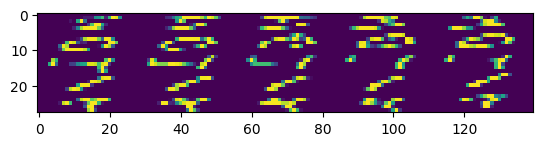

In [123]:
plt.imshow(train_images[:5].reshape(28,-1))
plt.show()

- hstack 방식
  - 옆으로 붙이는 방식

In [124]:
np.hstack(train_images[:5]).shape

(28, 140)

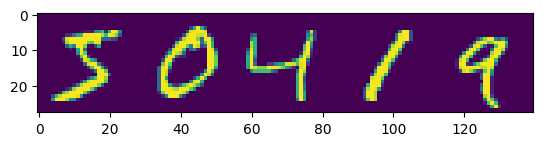

In [125]:
plt.imshow(np.hstack(train_images[:5]))
plt.show()

- transpose 방식
  - 축을 유지하면서 순서를 뒤섞는 방식
  - tensor 출력
  ```
  # transpose 안에 축 정보 줄 수 있음
  train_images[:5].transpose(축 정보)
  ```

In [126]:
train_images[:5].transpose(1, 0, 2).reshape(28, -1).shape  # B(0), H(1), W(2) -> H(1), B(0), W(2)

(28, 140)

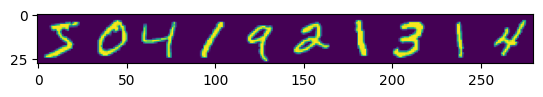

[5 0 4 1 9 2 1 3 1 4]


In [127]:
plt.imshow(train_images[:10].transpose((1, 0, 2)).reshape(28, -1))
plt.show()
print(train_labels[:10])

- 흑백으로 출력

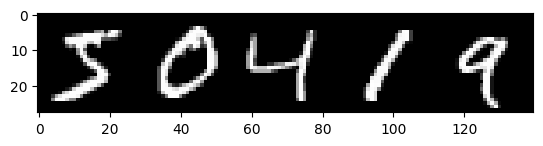

[5 0 4 1 9]


In [128]:
plt.imshow(train_images[:5].transpose((1, 0, 2)).reshape(28, -1), cmap='gray')
plt.show()
print(train_labels[:5])

## Data Augmentation - Noise 추가

### 1) random.random()

In [129]:
# np.random.random (0~1 사이의 랜덤값을 uniform random으로 출력 (확률이 같음))
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.5161780981329771
0.9920028099300965
0.5921542960159869


In [130]:
# np.random.random() 안에 size 파라미터 있음
print(np.random.random(5))
print(np.random.random((28,28)).shape)

[0.37050215 0.22960808 0.95479027 0.96800975 0.03014938]
(28, 28)


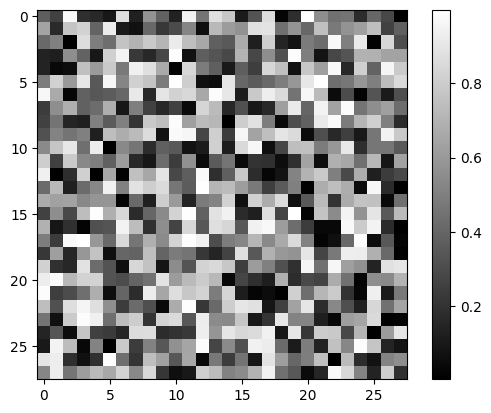

In [131]:
plt.imshow(np.random.random((28,28)), cmap='gray')
plt.colorbar()
plt.show()

### 2) 가우시안 noise

- 평균값 기준으로 가장 높은 확률값
- 편차만큼 꼬리 길어지는 형태

In [132]:
# mu 0
# std 0.1
# size1   -> 평균 0 이어서 0과 가까운 값들이 나옴
print(np.random.normal(0.0, 0.1, 1))
print(np.random.normal(0.0, 0.1, 1))
print(np.random.normal(0.0, 0.1, 1))

[-0.15717924]
[0.21592997]
[-0.04811662]


In [133]:
# 평균이 3.0, 표준편차 0.01 경우 3회 출력
print(np.random.normal(3.0, 0.01, 1))
print(np.random.normal(3.0, 0.01, 1))
print(np.random.normal(3.0, 0.01, 1))

[2.9776954]
[2.99723344]
[2.99319919]


In [134]:
# size를 (28,28)로 출력
print(np.random.normal(3.0, 0.01, (28,28)).shape)

(28, 28)


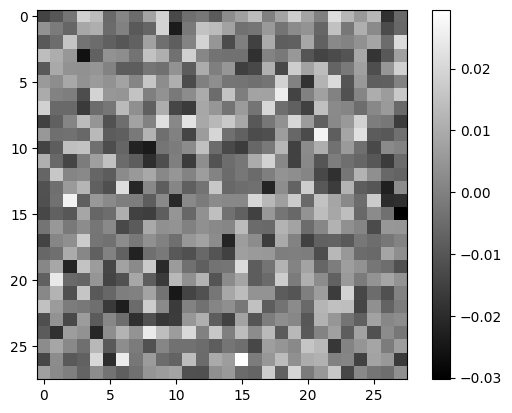

In [135]:
plt.imshow(np.random.normal(0.0, 0.01, (28,28)), cmap='gray')
plt.colorbar()
plt.show()

### train image에 가우시안 노이즈 합치기

- 5번째 이미지에 가우시안 노이즈 (28,28) 생성 후 합치기

In [136]:
# mu=0.5, std=0.1
noisy_image = train_images[5] + np.random.normal(0.5, 0.1, (28,28))

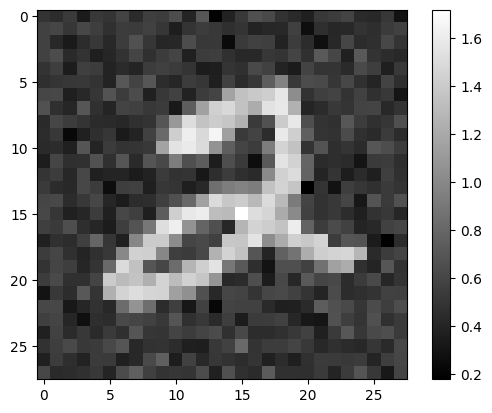

In [137]:
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

생성된 이미지가 1을 초과하므로 max를 1로 조정

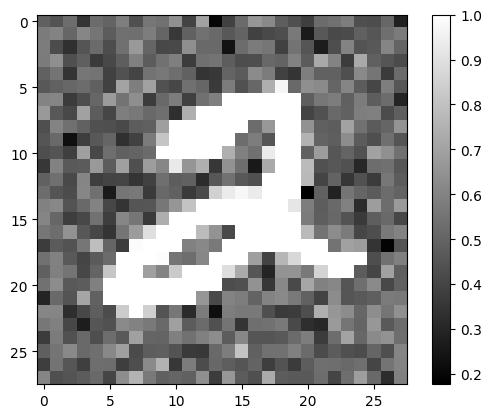

In [138]:
noisy_image[noisy_image >1.0] = 1.0
plt.imshow(noisy_image, cmap='gray')
plt.colorbar()
plt.show()

- 실제 데이터에 적용

In [139]:
train_images.shape

(60000, 28, 28)

In [140]:
train_noisy_images = train_images + np.random.normal(0.5, 0.1, train_images.shape)
train_noisy_images[train_noisy_images >1.0] = 1.0

test_noisy_images = test_images + np.random.normal(0.5, 0.1, test_images.shape)
test_noisy_images[test_noisy_images >1.0] = 1.0

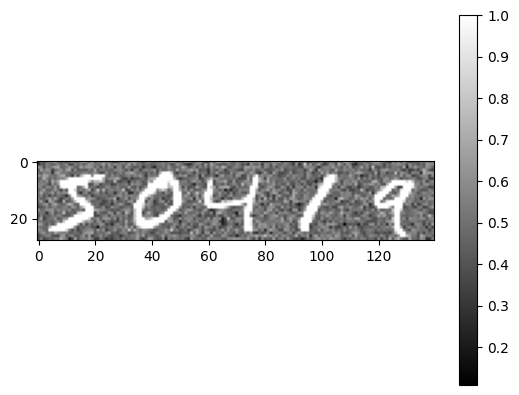

In [141]:
plt.imshow(train_noisy_images[:5].transpose(1,0,2).reshape(28,-1), cmap='gray')
plt.colorbar()
plt.show()

## label에 onehot encoding 적용 : 배치 사이즈, 클래스 개수의 shape으로 변경

In [142]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

딥러닝 입장에서 컬럼 번호를 맞추는게 더 쉬움

값이 있는 위치를 1로 켜주는 방식

In [143]:
from keras.utils import to_categorical

In [144]:
print(train_labels[0])
print(to_categorical(train_labels[0]))

5
[0. 0. 0. 0. 0. 1.]


텐서 길이가 유동적이게 되므로 길이를 정해줄 수 있음

In [145]:
print(to_categorical(train_labels[0], 10))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [146]:
print(f'train label shape : {train_labels.shape}, test label shape : {test_labels.shape}')

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print(f'train label shape : {train_labels.shape}, test label shape : {test_labels.shape}')

train label shape : (60000,), test label shape : (10000,)
train label shape : (60000, 10), test label shape : (10000, 10)


## 모델링

In [147]:
from keras.layers import SimpleRNN
from keras.layers import Dense, Input
from keras.models import Model

In [148]:
inputs = Input(shape =(28,28))
x1 = SimpleRNN(64, activation="tanh")(inputs)
x2 = Dense(10, activation="softmax")(x1)
model = Model(inputs, x2)

- 모델 요약 정보 출력

In [149]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 6602 (25.79 KB)
Trainable params: 6602 (25.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델에 loss, optimizer, metric 설정

In [150]:
model.compile(loss="categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

In [151]:
hist = model.fit(train_noisy_images, train_labels,
          validation_data = (test_noisy_images, test_labels),
          epochs=5, verbose=2)  # verbose=2 (학습하는 과정 출력)

Epoch 1/5
1875/1875 - 16s - loss: 0.6900 - accuracy: 0.7777 - val_loss: 0.4113 - val_accuracy: 0.8752 - 16s/epoch - 9ms/step
Epoch 2/5
1875/1875 - 13s - loss: 0.3670 - accuracy: 0.8887 - val_loss: 0.3264 - val_accuracy: 0.9013 - 13s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 12s - loss: 0.3036 - accuracy: 0.9090 - val_loss: 0.3030 - val_accuracy: 0.9105 - 12s/epoch - 7ms/step
Epoch 4/5
1875/1875 - 12s - loss: 0.2745 - accuracy: 0.9182 - val_loss: 0.2622 - val_accuracy: 0.9230 - 12s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 12s - loss: 0.2558 - accuracy: 0.9240 - val_loss: 0.2146 - val_accuracy: 0.9344 - 12s/epoch - 7ms/step


In [152]:
hist.epoch

[0, 1, 2, 3, 4]

In [153]:
hist.history

{'loss': [0.68999844789505,
  0.36698290705680847,
  0.3035872280597687,
  0.27446335554122925,
  0.25578030943870544],
 'accuracy': [0.7777166962623596,
  0.8887166380882263,
  0.9090499877929688,
  0.9181666374206543,
  0.9239833354949951],
 'val_loss': [0.41126590967178345,
  0.3264053165912628,
  0.3029627501964569,
  0.2621985375881195,
  0.21463413536548615],
 'val_accuracy': [0.8751999735832214,
  0.9013000130653381,
  0.9104999899864197,
  0.9229999780654907,
  0.9344000220298767]}

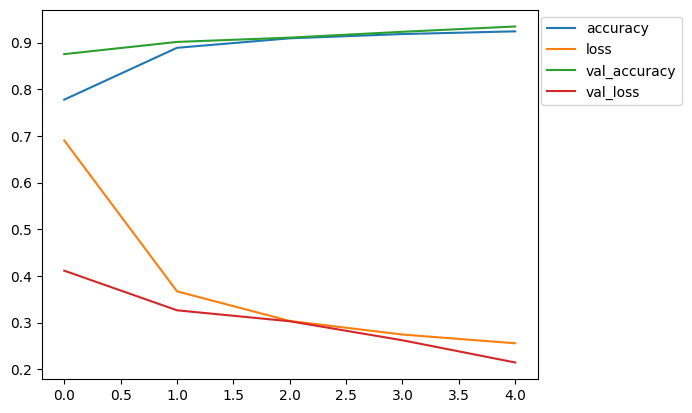

In [154]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper right', bbox_to_anchor=(1.305,1.0))
plt.show()

## 결과 확인

In [155]:
test_noisy_images[0].shape

(28, 28)

predict shape 맞추기 위해 앞에 Batch 추가해야

- 방법1

In [156]:
#test_noisy_images[0].reshape((1, 28, 28))
#model.predict(test_noisy_images[0].reshape((1, 28, 28)))

- 방법2
  - gpu 비용 많이 듦
  - 한꺼번에 빨리 처리하기 위해

In [157]:
# model.predict(np.array([test_noisy_images[0])])   # (28,28)을 한겹 쌓는 것을 np.array로 -> (1,28,28)

test_noisy_images 1장 넣고 결과 반환

In [158]:
res = model.predict(test_noisy_images[:1])
res.shape

1/1 [==============================] - 0s 155ms/step


(1, 10)

### test_noisy_images[0], test_images[0]을 결합해 plt 출력

(28, 56)


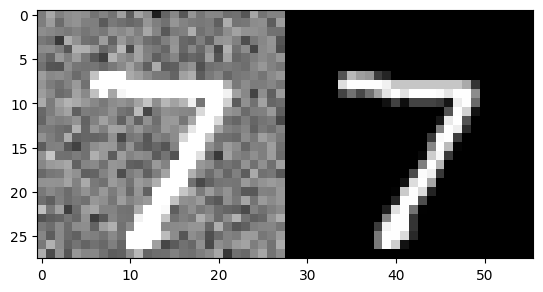

In [159]:
print(np.concatenate([test_noisy_images[0], test_images[0]], axis=1).shape)  # width 방향으로 결합
plt.imshow(np.concatenate([test_noisy_images[0], test_images[0]], axis=1), cmap='gray')
plt.show()

In [160]:
res

array([[7.7029035e-06, 2.4645237e-04, 2.7052479e-04, 7.7756710e-04,
        1.9027726e-05, 2.0242020e-04, 1.3603515e-06, 9.9785101e-01,
        1.3293478e-05, 6.1058573e-04]], dtype=float32)

In [161]:
res[0].argmax() # 가장 큰 값 index 출력

7

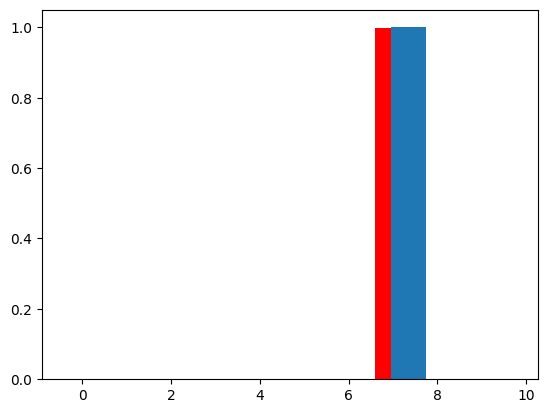

In [162]:
# res, test_labels[0]의 결과를 plt.bar로 확인
plt.bar(range(10), res[0], color='red')             # 모델 예측
plt.bar(np.array(range(10))+0.35, test_labels[0])   # 실제 label 정보 (실제 예측)
plt.show()

1/1 [==============================] - 0s 24ms/step
(1, 10)


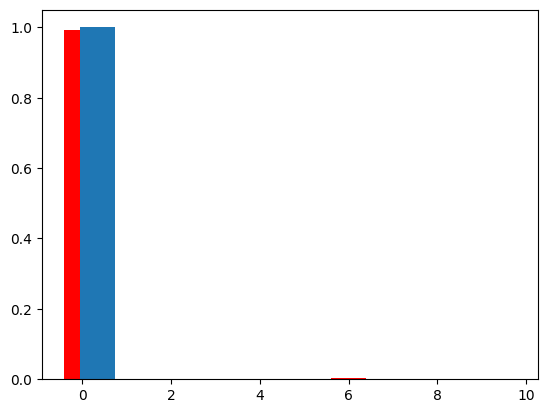

In [163]:
# 다른 예시도 확인
res2 = model.predict(test_noisy_images[3:4])
print(res2.shape)

plt.bar(range(10), res2[0], color='red')             # 모델 예측
plt.bar(np.array(range(10))+0.35, test_labels[3])   # 실제 label 정보 (실제 예측)
plt.show()

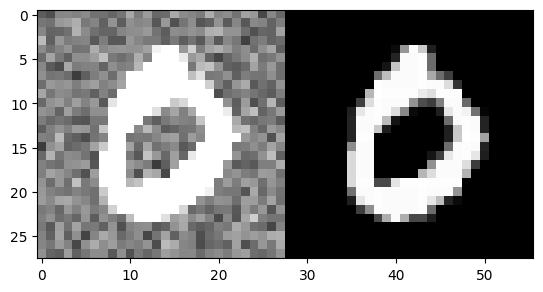

In [164]:
plt.imshow(np.concatenate([test_noisy_images[3], test_images[3]], axis=1), cmap='gray')
plt.show()

## 모델 저장, 로드, 다운

In [165]:
model.save(filepath='./model_01.h5')

In [166]:
# 모델 로드
new_model = tf.keras.models.load_model('./model_01.h5')

1/1 [==============================] - 0s 155ms/step
(1, 10)


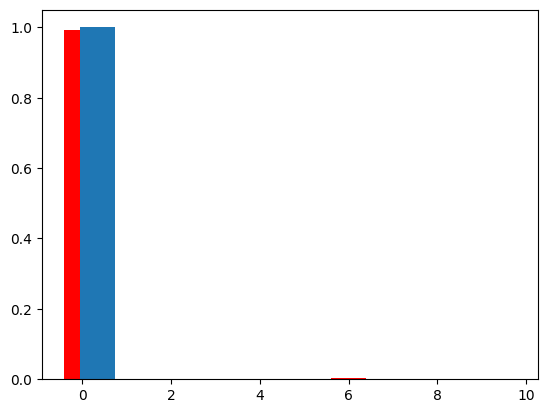

In [167]:
# 확인
res = new_model.predict(test_noisy_images[3:4])
print(res.shape)

plt.bar(range(10), res[0], color='red')             # 모델 예측
plt.bar(np.array(range(10))+0.35, test_labels[3])   # 실제 label 정보 (실제 예측)
plt.show()

In [168]:
# 로드한 모델을 test 데이터로 평가
loss, accuracy = new_model.evaluate(test_noisy_images, test_labels, verbose=2)
print(f'loss : {round(loss,2)}, accuracy: {round(accuracy,2)}')

313/313 - 1s - loss: 0.2146 - accuracy: 0.9344 - 1s/epoch - 4ms/step
loss : 0.21, accuracy: 0.93


In [169]:
# 컴퓨터에 모델 저장
from google.colab import files
files.download('./model_01.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>